In [1]:
# import required modules 
import zipfile 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

'''Our group members needed two different ways to open the data file, so if something is commented out or 
seems repetitive in this section, that is why.'''

# open zipped dataset 
#with zipfile.ZipFile("archive.zip") as z: 
   # open the csv file in the dataset 
 #  with z.open("diamonds.csv") as f: 
df = pd.read_csv("/Users/lizbolthouse/Downloads/diamonds.csv")           

      # read the dataset 
#df = pd.read_csv(f)

In [2]:
#Initial examination of the dataset
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [38]:
'''Two renames were necessary in this file. The first was changing the index from "Unnamed: 0" to something more
human-friendly (in this case ID). The other arose from trying to create a box plot for price using the .loc
function, but it kept throwing the same key error/not found in index error depending upon the exact syntax used. 
The rename was an attempt to remove any potential hidden characters that might cause the error.'''

df.rename(columns = {'Unnamed: 0':'ID'}, inplace = True) 
df.rename(columns = {'price':'price'}, inplace = True) 

In [4]:
#Checking the initial shape of the original dataframe
df.shape

(53940, 11)

In [5]:
#Checking for missing values
df.isnull().sum()

ID         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
#Looking at the unique data for each categorical column 

print(df['cut'].unique())

print(df['color'].unique())

print(df['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [7]:
'''The .unique() calls above tell us what type of data we are working with. The first is about the cut of the diamond.
In the diamond world, cut refers to the quality of the cutting of the diamond as opposed to the final shape of the 
diamond. Although it is unclear which gemological scale is being used here (I'm guessing a modified version of AGS), 
there are five grades of diamonds in this set.

The second categorical variable is color. All of the diamonds in this set are 'colorless', so color refers to how much
yellow pigment has infiltrated the diamond during its creation. The GIA scale, which appears to be in use here,
ranges from D-Z, with jewelers typically using D-M grade diamonds, with D being completely colorless. This dataset uses
grades D-J, all of which are clear enough to be set in platium without showing their yellow pigmentation.

The third variable is clarity. Almost every diamond has some sort of solid debris inside of it from its formation process.
In a lot of cases, this can be covered up by appropriate manipulation of the diamond, but it will impact the final price.
This data set shows the full scale of what jewellers will use, from IF (internally flawless) to I1 (Included - 1st degree).

With all that said, we need to convert this data to categorical data so we can use it in our K-Means algorithm.'''

#Convert all categorical data to ranked continuous data

df['cut(1-5)'] = df['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[5,4,3,2,1])

df['color(1-7)'] = df['color'].replace(['D', 'E', 'F', 'G', 'H', 'I', 'J'],[7,6,5,4,3,2,1])

df['clarity(1-11)'] = df['clarity'].replace(['FL','IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'],[11,10,9,8,7,6,5,4,3,2,1])

In [8]:
#Get rid of old categorical columns and the non-essential ID column

df.drop(columns=['cut','color','clarity'], inplace=True)

In [9]:
#Examine the new dataset

df

,ID,carat,depth,table,price,x,y,z,cut(1-5),color(1-7),clarity(1-11)
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,5,6,4
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,4,6,5
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,2,6,7
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,4,2,6
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,5,7,5
53936,53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,2,7,5
53937,53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,3,7,5
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,4,3,4


In [10]:
'''At this point, we need to begin looking for outliers. We decided to look for values that were beyond three standard
deviations in any direction and remove them from the dataset. This is especially important for clustering algorithms,
which are based on distances and will thus gravitate more towards outliers than other types of machine learning.'''

#Check all column datatypes

df.dtypes

ID                 int64
carat            float64
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
cut(1-5)           int64
color(1-7)         int64
clarity(1-11)      int64
dtype: object

In [11]:
#Convert all integer types to float so we can accurately calculate zscores

df['price'] = df['price'].astype(float)
df['cut(1-5)'] = df['cut(1-5)'].astype(float)
df['color(1-7)'] = df['color(1-7)'].astype(float)
df['clarity(1-11)'] = df['clarity(1-11)'].astype(float)

In [12]:
#Check to make sure all columns are float

df.dtypes

ID                 int64
carat            float64
depth            float64
table            float64
price            float64
x                float64
y                float64
z                float64
cut(1-5)         float64
color(1-7)       float64
clarity(1-11)    float64
dtype: object

In [13]:
#Create zscores for data

z = np.abs(stats.zscore(df))
print(z)

[[1.7320187  1.19816781 0.17409151 ... 0.98147332 0.93716275 1.24521508]
 [1.73195448 1.24036129 1.36073849 ... 0.08588908 0.93716275 0.63809506]
 [1.73189025 1.19816781 3.38501862 ... 1.70527938 0.93716275 0.57614496]
 ...
 [1.73189025 0.20662095 0.73334442 ... 0.80969515 1.52502147 0.63809506]
 [1.73195448 0.13092691 0.52310533 ... 0.08588908 0.8264134  1.24521508]
 [1.7320187  0.10113725 0.31452784 ... 0.98147332 1.52502147 1.24521508]]


In [14]:
#We'll use 3 as our threshold for zscore

threshold = 3
print(np.where(z > 3))

(array([    2,     2,    91, ..., 53785, 53800, 53863]), array([2, 3, 2, ..., 3, 2, 2]))


In [15]:
#Create a cleaned dataset without outliers
#Since we are clustering, we do not want outliers to significantly affect our data

clean_df= df[(z < 3).all(axis=1)]

In [16]:
#Look at shape of dataset with outliers

df.shape

(53940, 11)

In [17]:
#Look at shape of dataset without outliers
#We can see that we took out 2,350 rows

clean_df.shape

(51590, 11)

In [42]:
#lLook at statistical summary of dataset with outliers

df.describe()

,ID,carat,depth,table,price,x,y,z,cut(1-5),color(1-7),clarity(1-11)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,3.904097,4.405803,6.051020
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600,1.701105,1.647136
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,3.000000,3.000000,5.000000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,4.000000,4.000000,6.000000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,5.000000,6.000000,7.000000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,5.000000,7.000000,10.000000


In [19]:
#Look at statistical summary of dataset without outliers
#We can see that there is an approximately $400 drop in mean price between the original and clean dataset

clean_df.describe()

,ID,carat,depth,table,price,x,y,z,cut(1-5),color(1-7),clarity(1-11)
count,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000
mean,27007.824675,0.759933,61.752838,57.369137,3586.031847,5.657855,5.661272,3.494649,3.952549,4.433553,6.086994
std,15728.274065,0.424983,1.269255,2.100018,3436.874161,1.057420,1.050383,0.653051,1.070666,1.694698,1.642585
min,1.000000,0.200000,57.500000,51.000000,326.000000,3.730000,3.680000,1.530000,1.000000,1.000000,3.000000
25%,13239.250000,0.390000,61.100000,56.000000,926.000000,4.690000,4.700000,2.890000,3.000000,3.000000,5.000000
50%,27713.500000,0.700000,61.800000,57.000000,2303.500000,5.660000,5.660000,3.490000,4.000000,4.000000,6.000000
75%,40758.750000,1.020000,62.500000,59.000000,5047.000000,6.490000,6.490000,4.010000,5.000000,6.000000,7.000000
max,53940.000000,2.210000,66.000000,64.000000,15898.000000,8.600000,8.550000,5.300000,5.000000,7.000000,10.000000


In [20]:
'''Our data, as is typical for many data sets, has variables of vastly different sizes. This is especially apparent
between carat and price, where the former is often below one unit and the latter is measured in the thousands. As a 
result it is necessary to standardize the data in order to make the contents more directly comparable to itself.'''

#Here, we standardize the data

Y = clean_df.values[:,1:]
Y = np.nan_to_num(Y)
Clus_dataSet = StandardScaler().fit_transform(Y)
Clus_dataSet

array([[-1.24696153, -0.19920362, -1.12816202, ...,  0.9783264 ,
         0.92433102, -1.27056653],
       [-1.29402267, -1.53858485,  1.72898423, ...,  0.04431961,
         0.92433102, -0.66176422],
       [-1.1057781 ,  0.50988056,  0.3004111 , ...,  0.04431961,
        -1.43599405, -0.05296191],
       ...,
       [-0.1410247 ,  0.82502909,  1.25279319, ..., -0.88968719,
         1.51441229, -0.66176422],
       [ 0.23546443, -0.59313927,  0.3004111 , ...,  0.04431961,
        -0.84591278, -1.27056653],
       [-0.02337185,  0.3523063 , -1.12816202, ...,  0.9783264 ,
         1.51441229, -1.27056653]])

/Users/lizbolthouse/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/lizbolthouse/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/lizbolthouse/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/lizbolthouse/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/l

Text(0, 0.5, 'Inertia')

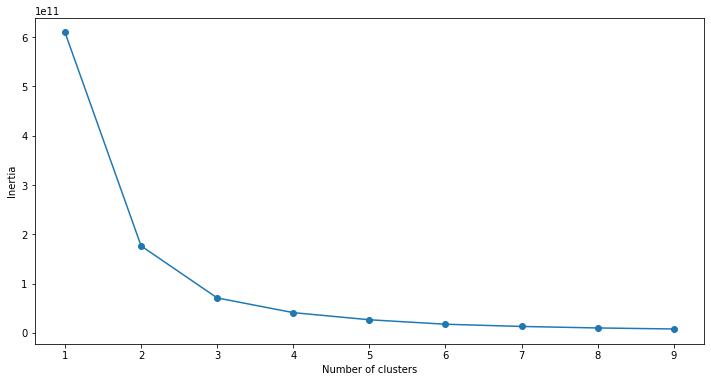

In [21]:
'''The next step is to determine the most appropriate number of clusters for the K Means algorithm to partition our
data into. Doing this step incorrectly or differently may entirely change the outcome of the model.
We are chosing to through make an elbow graph and find the point after which the difference in intertia 
lessens to a noticible degree.'''

#Going to determine the number of clusters required

SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(Y)
    SSE.append(kmeans.inertia_)
    
    
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))


plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [22]:
#There seems to be a lot less of a difference in inertia after k=4, so we will use 4 clusters.

In [23]:
'''After determining the number of centroids to bring into the algorithm, it is time to put it to work.'''

#Create and assign clusters to the data

clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Y)
labels = k_means.labels_
print(labels)

[0 0 0 ... 2 2 2]


In [24]:
#Add a cluster column to the dataset

clean_df["Cluster"] = labels
clean_df.head(5)

<ipython-input-24-c77fe60740c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Cluster"] = labels


,ID,carat,depth,table,price,x,y,z,cut(1-5),color(1-7),clarity(1-11),Cluster
0,1,0.23,61.5,55.0,326.0,3.95,3.98,2.43,5.0,6.0,4.0,0
1,2,0.21,59.8,61.0,326.0,3.89,3.84,2.31,4.0,6.0,5.0,0
3,4,0.29,62.4,58.0,334.0,4.20,4.23,2.63,4.0,2.0,6.0,0
4,5,0.31,63.3,58.0,335.0,4.34,4.35,2.75,2.0,1.0,4.0,0
5,6,0.24,62.8,57.0,336.0,3.94,3.96,2.48,3.0,1.0,8.0,0


In [25]:
#Group the data by clusters

clean_df.groupby('Cluster').mean()

,ID,carat,depth,table,price,x,y,z,cut(1-5),color(1-7),clarity(1-11)
Cluster,,,,,,,,,,,
0,37978.499294,0.443977,61.721935,57.053464,1207.052479,4.845311,4.853194,2.992623,4.065263,4.654259,6.462565
1,18457.953689,1.252044,61.756206,57.663075,7703.204538,6.884815,6.881306,4.249841,3.895338,3.999383,6.029484
2,8412.130158,0.959005,61.837963,57.797679,4204.037166,6.291750,6.291131,3.889984,3.736802,4.307115,5.315686
3,24213.272702,1.627633,61.678350,57.752464,12596.096346,7.513472,7.509023,4.632841,3.959025,3.943522,6.061185


In [26]:
"""
We can see that carat, price, and dimension differ the most among clusters.

Diamonds with greater carat count and larger dimensions tend to be priced higher.

Attributes such as depth, table, cut, color, and clarity do not seem to have as large of a difference between clusters.

Counterintuitively, the mean for cut, color, and clarity is the highest in the cluster with the lowest price. This shows
that these attributes will not have as large of an effect on price.
"""

'\nWe can see that carat, price, and dimension differ the most among clusters.\n\nDiamonds with greater carat count and larger dimensions tend to be priced higher.\n\nAttributes such as depth, table, cut, color, and clarity do not seem to have as large of a difference between clusters.\n\nCounterintuitively, the mean for cut, color, and clarity is the highest in the cluster with the lowest price. This shows\nthat these attributes will not have as large of an effect on price.\n'

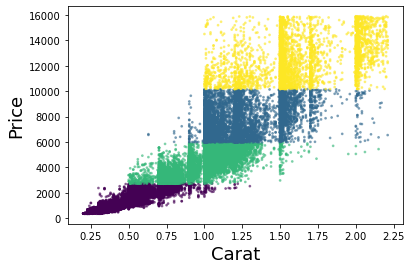

In [27]:
'''Since price and carat are both very important factors in distinguishing the clusters, it would be interesting to
graph them.'''
#Show clusters based on price and carat count
#There seems to be a correlation between carat and price


area = np.pi * ( 1)**2  
plt.scatter(Y[:, 0 ], Y[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Carat', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

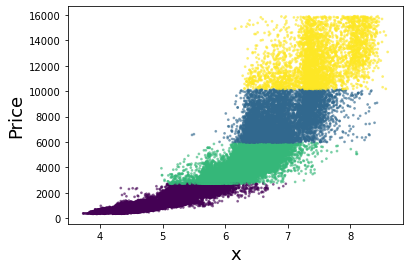

In [28]:
'''Dimension(s) is/are the third factor that seem to determine cluster placement, so it would be interesting to
graph the X dimension next to price.'''
#Show clusters based on price and x-dimension
#There seems to be a correlation between x and price

area = np.pi * ( 1)**2  
plt.scatter(Y[:, 4 ], Y[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('x', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

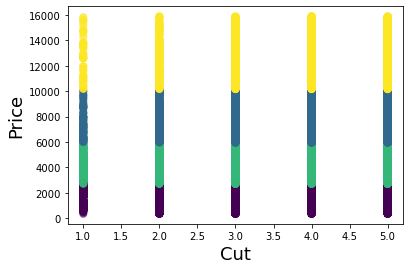

In [30]:
'''Cut was not determined to be as significant a factor in determining cluster placement. This is interesting, given
that people will usually pay more for higher quality workmanship, which is integral to cut, and price is a key clustering
factor. Let's see if there is any connection between cut and price in this data set.'''

#Show clusters based on price and cut
#Cut quality does not seem to be a large factor in determining price

area = np.pi * ( 4)**2  
plt.scatter(Y[:, 7 ], Y[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Cut', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

<AxesSubplot:>

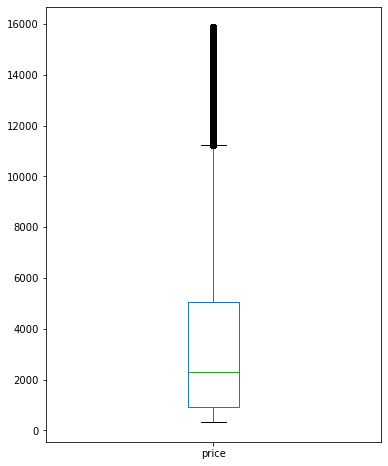

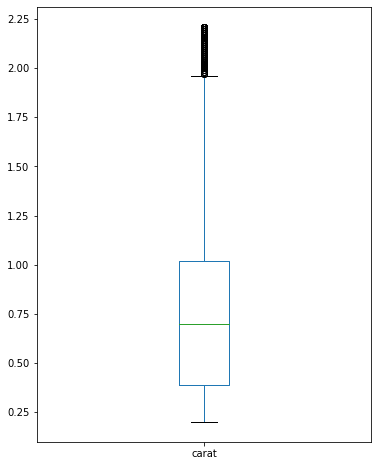

In [82]:
'''It was suspected that there might still be some 'outliers' in price, as most monetary data sets are right tailed. 
To determine this, we made a box plot of price. This was proved correct. A box plot was also
made of carat, with similar, but much less extreme, results. 
'''

df_price = clean_df[['price']]
df_price.plot(kind='box', figsize=(6, 8))
df_carat = clean_df[['carat']]
df_carat.plot(kind='box', figsize=(6, 8))

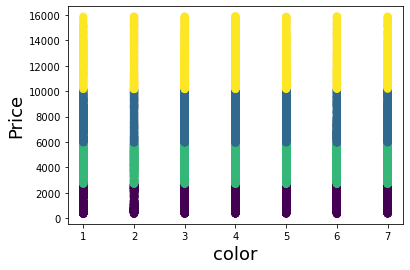

In [84]:
area = np.pi * ( 4)**2  
plt.scatter(Y[:, 8 ], Y[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('color', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()